讀取資料

In [117]:
import pandas as pd
import numpy as np

In [118]:
df = pd.read_csv('/Users/chloie/Desktop/deleted_outlier-2.csv')

In [119]:
df.shape

(238485, 41)

In [120]:
df.head(3)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,cal_BMI
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,27.996094
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,30.062492
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,31.807159


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238485 entries, 0 to 238484
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      238485 non-null  object 
 1   Sex                        238485 non-null  object 
 2   GeneralHealth              238485 non-null  object 
 3   PhysicalHealthDays         238485 non-null  float64
 4   MentalHealthDays           238485 non-null  float64
 5   LastCheckupTime            238485 non-null  object 
 6   PhysicalActivities         238485 non-null  object 
 7   SleepHours                 238485 non-null  float64
 8   RemovedTeeth               238485 non-null  object 
 9   HadHeartAttack             238485 non-null  object 
 10  HadAngina                  238485 non-null  object 
 11  HadStroke                  238485 non-null  object 
 12  HadAsthma                  238485 non-null  object 
 13  HadSkinCancer              23

In [122]:
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'cal_BMI']
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [123]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,cal_BMI
count,238485.000000,238485.000000,238485.000000,238485.000000,238485.000000,238485.000000,238485.000000
mean,3.987244,4.056381,7.028555,1.706223,81.920603,28.025915,28.024128
std,8.271507,7.994228,1.428929,0.105897,18.871613,5.395607,5.396821
min,0.000000,0.000000,1.000000,1.030000,28.120000,12.020000,11.950017
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.140000,24.107143
50%,0.000000,0.000000,7.000000,1.700000,80.290000,27.370000,27.320720
75%,3.000000,4.000000,8.000000,1.780000,92.990000,31.320000,31.391003
max,30.000000,30.000000,24.000000,2.410000,181.440000,43.280000,43.471147


In [124]:
missing = df.isnull().sum()
missing;

Encoding

In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [126]:
print(df.GeneralHealth.value_counts())

GeneralHealth
Very good    85789
Good         74420
Excellent    41263
Fair         28405
Poor          8608
Name: count, dtype: int64


In [127]:
print(df.AgeCategory.value_counts())

AgeCategory
Age 65 to 69       27846
Age 60 to 64       25883
Age 70 to 74       25228
Age 55 to 59       21332
Age 50 to 54       19031
Age 75 to 79       17913
Age 80 or older    17731
Age 40 to 44       16198
Age 45 to 49       15953
Age 35 to 39       14952
Age 18 to 24       12873
Age 30 to 34       12796
Age 25 to 29       10749
Name: count, dtype: int64


In [128]:
print(df.TetanusLast10Tdap.value_counts())

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    79143
Yes, received tetanus shot but not sure what type            71954
Yes, received Tdap                                           68114
Yes, received tetanus shot, but not Tdap                     19274
Name: count, dtype: int64


In [129]:
df_XGBoost = df.copy()

In [130]:
# 目標欄位 'HadHeartAttack'
df_XGBoost['HadHeartAttack'] = df_XGBoost['HadHeartAttack'].str.strip().str.lower()
df_XGBoost['HadHeartAttack'] = df_XGBoost['HadHeartAttack'].map({'yes': 1, 'no': 0})
df_XGBoost['HadHeartAttack'] = df_XGBoost['HadHeartAttack'].fillna(0).astype(int)

# Ordinal Encoding
health_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df_XGBoost['GeneralHealth'] = df_XGBoost['GeneralHealth'].map(health_map)

age_map = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}
df_XGBoost['AgeCategory'] = df_XGBoost['AgeCategory'].map(age_map)

# 移除 VIF 過高欄位（避免 multicollinearity & error）
drop_cols = ['BMI', 'WeightInKilograms', 'HeightInMeters']
df_XGBoost = df_XGBoost.drop(columns=[col for col in drop_cols if col in df_XGBoost.columns])

# One-hot Encoding for remaining categorical variables
already_encoded = ['HadHeartAttack', 'GeneralHealth', 'AgeCategory']
onehot_cols = df_XGBoost.select_dtypes(include='object').columns.tolist()
onehot_cols = [col for col in onehot_cols if col not in already_encoded]

# 執行 one-hot encoding
df_XGBoost = pd.get_dummies(df_XGBoost, columns=onehot_cols, drop_first=True)

# 最終檢查
print("✅ 編碼後欄位數：", df_XGBoost.shape[1])
print("✅ Null 值檢查：\n", df_XGBoost.isnull().sum().sort_values(ascending=False).head())


✅ 編碼後欄位數： 106
✅ Null 值檢查：
 GeneralHealth                                          0
DeafOrHardOfHearing_Yes                                0
HadDiabetes_Yes                                        0
HadDiabetes_No, pre-diabetes or borderline diabetes    0
HadArthritis_Yes                                       0
dtype: int64


In [131]:
m = df_XGBoost.isnull().sum()
m;

XGBoost Baseline

In [132]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, fbeta_score, confusion_matrix

# 資料切分
X = df_XGBoost.drop(columns=['HadHeartAttack'])
y = df_XGBoost['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Baseline 模型
xgb_baseline = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_baseline.fit(X_train, y_train)

y_proba_base = xgb_baseline.predict_proba(X_test)[:, 1]
y_pred_base = (y_proba_base >= 0.5).astype(int)

print("📌 Baseline Classification Report")
print(classification_report(y_test, y_pred_base, digits=4))
print(f"ROC-AUC (baseline): {roc_auc_score(y_test, y_proba_base):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_base))

y_proba_train_base = xgb_baseline.predict_proba(X_train)[:, 1]
print(f"ROC-AUC (train)   : {roc_auc_score(y_train, y_proba_train_base):.4f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:56:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 Baseline Classification Report
              precision    recall  f1-score   support

           0     0.9575    0.9894    0.9732     67661
           1     0.5613    0.2355    0.3318      3885

    accuracy                         0.9485     71546
   macro avg     0.7594    0.6125    0.6525     71546
weighted avg     0.9360    0.9485    0.9384     71546

ROC-AUC (baseline): 0.8868
Confusion Matrix:
 [[66946   715]
 [ 2970   915]]
ROC-AUC (train)   : 0.9377


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 訓練集預測值與機率
y_proba_train_base = xgb_baseline.predict_proba(X_train)[:, 1]
y_pred_train_base = (y_proba_train_base >= 0.5).astype(int)

# 測試集預測值與機率
y_proba_test_base = xgb_baseline.predict_proba(X_test)[:, 1]
y_pred_test_base = (y_proba_test_base >= 0.5).astype(int)

# 計算 AUC 和其他指標
print("📊 Evaluation Metrics for Baseline XGBoost")
print('Train ROC-AUC      :', roc_auc_score(y_train, y_proba_train_base))
print('Test ROC-AUC       :', roc_auc_score(y_test, y_proba_test_base))
print('Train Recall       :', recall_score(y_train, y_pred_train_base))
print('Test Recall        :', recall_score(y_test, y_pred_test_base))
print('Train Precision    :', precision_score(y_train, y_pred_train_base))
print('Test Precision     :', precision_score(y_test, y_pred_test_base))
print('Train Accuracy     :', accuracy_score(y_train, y_pred_train_base))
print('Test Accuracy      :', accuracy_score(y_test, y_pred_test_base))

📊 Evaluation Metrics for Baseline XGBoost
Train ROC-AUC      : 0.9377115695906992
Test ROC-AUC       : 0.8867873675709798
Train Recall       : 0.3612796469939327
Test Recall        : 0.23552123552123552
Train Precision    : 0.7987804878048781
Test Precision     : 0.5613496932515337
Train Accuracy     : 0.9603747476623198
Test Accuracy      : 0.9484946747547033


特徵篩選

In [134]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 重新訓練 XGB 模型抓 importance
xgb_temp = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_temp.fit(X_train, y_train)

xgb_importance = pd.Series(xgb_temp.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_top30 = xgb_importance.head(20)

# SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=20)
selector.fit(X_train, y_train)
kbest_scores = pd.Series(selector.scores_, index=X_train.columns).sort_values(ascending=False)
kbest_top30 = kbest_scores.head(20)

# 特徵交集與聯集
intersect_features = list(set(xgb_top30.index) & set(kbest_top30.index))
union_features = list(set(xgb_top30.index) | set(kbest_top30.index))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:56:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [135]:
import pandas as pd

# 1. 如果它們是 list，先把它們轉回 Series：
if isinstance(xgb_importance, list):
    xgb_importance = pd.Series(xgb_importance, index=X_train.columns)
if isinstance(kbest_scores, list):
    kbest_scores = pd.Series(kbest_scores, index=X_train.columns)

# 2. 排序（如果還沒排序）
xgb_importance = xgb_importance.sort_values(ascending=False)
kbest_scores    = kbest_scores.sort_values(ascending=False)

# 3. 列印前 20 筆，或全部
print("🌟 XGBoost Feature Importances (Top 20) 🌟")
print(xgb_importance.head(20).to_string())

print("\n🌟 SelectKBest Mutual Information Scores (Top 20) 🌟")
print(kbest_scores.head(20).to_string())

# 4. 若想一次比較兩者，也可以合併成 DataFrame
df_compare = pd.concat([
    xgb_importance.rename("XGB_importance"),
    kbest_scores.rename("MutualInfo_score")
], axis=1)
print("\n=== 比較表 (Top 20) ===")
print(df_compare.head(20).to_string())


🌟 XGBoost Feature Importances (Top 20) 🌟
HadAngina_Yes                0.350564
ChestScan_Yes                0.052074
HadStroke_Yes                0.032999
GeneralHealth                0.021079
AgeCategory                  0.020600
Sex_Male                     0.019095
HadDiabetes_Yes              0.011298
RemovedTeeth_All             0.010346
SmokerStatus_Never smoked    0.009903
DifficultyWalking_Yes        0.008048
RemovedTeeth_None of them    0.007647
State_South Dakota           0.007360
State_Colorado               0.006798
DeafOrHardOfHearing_Yes      0.006512
State_Kansas                 0.006145
State_Oklahoma               0.006127
State_Nebraska               0.006115
AlcoholDrinkers_Yes          0.006088
HadKidneyDisease_Yes         0.006080
HadCOPD_Yes                  0.006059

🌟 SelectKBest Mutual Information Scores (Top 20) 🌟
HadAngina_Yes                                                          0.057258
ChestScan_Yes                                                      

Gridsearch(含不平衡處理)

In [136]:
# 動態設定 scale_pos_weight（用於 GridSearch 範圍中心值）
from collections import Counter

counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print(f"動態計算的 scale_pos_weight: {scale_pos_weight:.2f}")

動態計算的 scale_pos_weight: 17.42


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

f2_scorer = make_scorer(fbeta_score, beta=2)

# 建立 pipeline
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])


# GridSearch 參數
param_grid = {
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1],
    'clf__n_estimators': [100, 200],
    'clf__min_child_weight': [1, 5],
    'clf__subsample': [0.8],
    'clf__colsample_bytree': [0.8],
    'clf__scale_pos_weight': [round(scale_pos_weight), int(scale_pos_weight) + 5, int(scale_pos_weight) + 10],
}

In [138]:
grid = GridSearchCV(
    pipe_xgb,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("✅ 最佳參數：", grid.best_params_)
print("✅ F2-score：", grid.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:56:58] WARN

✅ 最佳參數： {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__min_child_weight': 1, 'clf__n_estimators': 200, 'clf__scale_pos_weight': 17, 'clf__subsample': 0.8}
✅ F2-score： 0.5090777123080413


In [139]:
# grid.best_params_ = {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 7, 'clf__min_child_weight': 5, 'clf__n_estimators': 200, 'clf__scale_pos_weight': 17, 'clf__subsample': 0.8}

特徵篩選 + Gridsearch

In [140]:
# intersect_features

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_threshold = 0.5

final_xgb = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

pipe_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', final_xgb)
])
pipe_final.fit(X_train[intersect_features], y_train)

y_proba_final = pipe_final.predict_proba(X_test[intersect_features])[:, 1]
y_pred_final = (y_proba_final >= best_threshold).astype(int)

# 評估報告
print("XGB 評估 特徵篩選 + GirdSearch")
print(classification_report(y_test, y_pred_final, digits=4))
print(f"F2 score: {fbeta_score(y_test, y_pred_final, beta=2):.4f}")
print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_proba_final):.4f}")

# Training AUC 判斷 overfit
y_proba_train = pipe_final.predict_proba(X_train[intersect_features])[:, 1]
print(f"ROC-AUC (Train): {roc_auc_score(y_train, y_proba_train):.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB 評估 特徵篩選 + GirdSearch
              precision    recall  f1-score   support

           0     0.9845    0.8170    0.8930     67661
           1     0.1957    0.7755    0.3126      3885

    accuracy                         0.8147     71546
   macro avg     0.5901    0.7963    0.6028     71546
weighted avg     0.9416    0.8147    0.8614     71546

F2 score: 0.4870
ROC-AUC (Test): 0.8808
ROC-AUC (Train): 0.9047
Confusion Matrix:
 [[55279 12382]
 [  872  3013]]


In [141]:
# union_features 
pipe_final.fit(X_train[union_features], y_train)
y_proba_final = pipe_final.predict_proba(X_test[union_features])[:, 1]
y_pred_final = (y_proba_final >= 0.51).astype(int)

print("XGB 評估（Union 特徵集）")
print(classification_report(y_test, y_pred_final))
print(f"F2 score: {fbeta_score(y_test, y_pred_final, beta=2):.4f}")
print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_proba_final):.4f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB 評估（Union 特徵集）
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     67661
           1       0.23      0.72      0.35      3885

    accuracy                           0.85     71546
   macro avg       0.61      0.79      0.63     71546
weighted avg       0.94      0.85      0.89     71546

F2 score: 0.5081
ROC-AUC (Test): 0.8817


In [142]:
# select k best

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score

# 1. 取出 SelectKBest 篩到的前 20 個特徵
selected_kbest = kbest_scores.head(20).index.tolist()

# 2. 建立最終 XGB 模型（載入 GridSearch 最佳參數）
final_xgb = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

pipe_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    final_xgb)
])

# 3. 用 SelectKBest 特徵訓練
pipe_final.fit(X_train[selected_kbest], y_train)

# 4. 預測機率與分類
best_threshold   = 0.5
y_proba_test     = pipe_final.predict_proba(X_test[selected_kbest])[:, 1]
y_pred_test      = (y_proba_test >= best_threshold).astype(int)

# 5. 評估報告
print("📌 XGB + SelectKBest(20) + GridSearch + Threshold=0.5\n")
print(classification_report(y_test, y_pred_test, digits=4))
print(f"F2 score          : {fbeta_score(y_test, y_pred_test, beta=2):.4f}")
print(f"ROC-AUC (Test)    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# 6. 訓練集 AUC 判斷 overfitting
y_proba_train = pipe_final.predict_proba(X_train[selected_kbest])[:, 1]
print(f"\nROC-AUC (Train)   : {roc_auc_score(y_train, y_proba_train):.4f}")



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 XGB + SelectKBest(20) + GridSearch + Threshold=0.5

              precision    recall  f1-score   support

           0     0.9825    0.8425    0.9071     67661
           1     0.2121    0.7385    0.3296      3885

    accuracy                         0.8369     71546
   macro avg     0.5973    0.7905    0.6184     71546
weighted avg     0.9407    0.8369    0.8758     71546

F2 score          : 0.4936
ROC-AUC (Test)    : 0.8792

Confusion Matrix:
[[57006 10655]
 [ 1016  2869]]

ROC-AUC (Train)   : 0.9335


In [143]:
# xgb_importance

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score

# 1. 取出 SelectKBest 篩到的前 20 個特徵
selected_feature = union_features

# 2. 建立最終 XGB 模型（載入 GridSearch 最佳參數）
final_xgb = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

pipe_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    final_xgb)
])

# 3. 用 SelectKBest 特徵訓練
pipe_final.fit(X_train[selected_feature], y_train)

# 4. 預測機率與分類
best_threshold   = 0.5
y_proba_test     = pipe_final.predict_proba(X_test[selected_feature])[:, 1]
y_pred_test      = (y_proba_test >= best_threshold).astype(int)

# 5. 評估報告
print("📌 XGB + union_features + GridSearch + Threshold=0.5\n")
print(classification_report(y_test, y_pred_test, digits=4))
print(f"F2 score          : {fbeta_score(y_test, y_pred_test, beta=2):.4f}")
print(f"ROC-AUC (Test)    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# 6. 訓練集 AUC 判斷 overfitting
y_proba_train = pipe_final.predict_proba(X_train[selected_feature])[:, 1]
print(f"\nROC-AUC (Train)   : {roc_auc_score(y_train, y_proba_train):.4f}")




/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 XGB + union_features + GridSearch + Threshold=0.5

              precision    recall  f1-score   support

           0     0.9824    0.8564    0.9151     67661
           1     0.2264    0.7320    0.3459      3885

    accuracy                         0.8496     71546
   macro avg     0.6044    0.7942    0.6305     71546
weighted avg     0.9413    0.8496    0.8842     71546

F2 score          : 0.5060
ROC-AUC (Test)    : 0.8817

Confusion Matrix:
[[57945  9716]
 [ 1041  2844]]

ROC-AUC (Train)   : 0.9384


Threshold

In [144]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

def evaluate_thresholds(y_test,  y_proba_final, thresholds=np.arange(0.4, 0.7, 0.01)):
    results = []
    for t in thresholds:
        y_pred_final = (y_proba_final >= t).astype(int)
        results.append({
            'Threshold': round(t, 2),
            'Precision': precision_score(y_test, y_pred_final),
            'Recall': recall_score(y_test, y_pred_final),
            'F1-score': f1_score(y_test, y_pred_final),
            'F2-score': fbeta_score(y_test, y_pred_final, beta=2),
            'ROC-AUC': roc_auc_score(y_test,  y_proba_final)  # 機率不受 threshold 影響
        })
    return pd.DataFrame(results)

# ✅ 執行：以你模型的 y_proba_final 為例
threshold_df = evaluate_thresholds(y_test, y_proba_final)


# 顯示前幾個最佳門檻
print(threshold_df)


    Threshold  Precision    Recall  F1-score  F2-score   ROC-AUC
0        0.40   0.179900  0.805405  0.294107  0.475055  0.881656
1        0.41   0.183994  0.799485  0.299143  0.479011  0.881656
2        0.42   0.187810  0.790734  0.303527  0.481550  0.881656
3        0.43   0.192177  0.784041  0.308690  0.485186  0.881656
4        0.44   0.196239  0.776319  0.313286  0.487884  0.881656
5        0.45   0.200657  0.769884  0.318344  0.491198  0.881656
6        0.46   0.205527  0.761905  0.323727  0.494289  0.881656
7        0.47   0.210579  0.754183  0.329232  0.497386  0.881656
8        0.48   0.216138  0.748777  0.335447  0.501569  0.881656
9        0.49   0.220770  0.739254  0.340002  0.502995  0.881656
10       0.50   0.226433  0.732046  0.345880  0.506050  0.881656
11       0.51   0.231675  0.724067  0.351033  0.508092  0.881656
12       0.52   0.237210  0.716088  0.356370  0.510122  0.881656
13       0.53   0.242221  0.707336  0.360867  0.511066  0.881656
14       0.54   0.248492 

In [145]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_threshold = 0.50

final_xgb = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

pipe_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', final_xgb)
])
pipe_final.fit(X_train[union_features], y_train)

y_proba_final = pipe_final.predict_proba(X_test[union_features])[:, 1]
y_pred_final = (y_proba_final >= best_threshold).astype(int)

# 評估報告
print("XGB 評估 特徵篩選 + GirdSearch + Threshold")
print(classification_report(y_test, y_pred_final, digits=4))
print(f"F2 score: {fbeta_score(y_test, y_pred_final, beta=2):.4f}")
print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_proba_final):.4f}")

# Training AUC 判斷 overfit
y_proba_train = pipe_final.predict_proba(X_train[union_features])[:, 1]
print(f"ROC-AUC (Train): {roc_auc_score(y_train, y_proba_train):.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB 評估 特徵篩選 + GirdSearch + Threshold
              precision    recall  f1-score   support

           0     0.9824    0.8564    0.9151     67661
           1     0.2264    0.7320    0.3459      3885

    accuracy                         0.8496     71546
   macro avg     0.6044    0.7942    0.6305     71546
weighted avg     0.9413    0.8496    0.8842     71546

F2 score: 0.5060
ROC-AUC (Test): 0.8817
ROC-AUC (Train): 0.9384
Confusion Matrix:
 [[57945  9716]
 [ 1041  2844]]


Ensemble：Stacking（XGBoost + Logistic Regression）

In [146]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

final_xgb = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

final_log = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

stack_model = StackingClassifier(
    estimators=[('xgb', final_xgb), ('log', final_log)],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stack_model.fit(X_train[union_features], y_train)
y_proba = stack_model.predict_proba(X_test[union_features])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("📌 StackingClassifier（XGB + Logistic）")
print(classification_report(y_test, y_pred, digits=4))
print("F2:", fbeta_score(y_test, y_pred, beta=2))
print("ROC-AUC (Test):", roc_auc_score(y_test, y_proba))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:58:59] WARN

📌 StackingClassifier（XGB + Logistic）
              precision    recall  f1-score   support

           0     0.9579    0.9902    0.9738     67661
           1     0.5873    0.2425    0.3432      3885

    accuracy                         0.9496     71546
   macro avg     0.7726    0.6163    0.6585     71546
weighted avg     0.9378    0.9496    0.9396     71546

F2: 0.27473168455436303
ROC-AUC (Test): 0.8925608963163834


融合模型：VotingClassifier

In [147]:
# XGB + Logistic(soft)
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 建立各模型（建議用最佳參數）
final_log = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
final_xgb = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# 為了避免前處理不一致，將每個模型都包進 Pipeline
pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', final_log)
])

pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', final_xgb)
])

# VotingClassifier
voting_model = VotingClassifier(
    estimators=[('xgb', pipe_xgb), ('log', pipe_log)],
    voting='soft'
)

# 使用切好的資料
voting_model.fit(X_train[union_features], y_train)

# 預測
y_proba = voting_model.predict_proba(X_test[union_features])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# Training AUC
y_proba_train = voting_model.predict_proba(X_train[union_features])[:, 1]

# 評估指標
print("XGB + Logistic(soft)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:59:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB + Logistic(soft)
              precision    recall  f1-score   support

           0     0.9842    0.8503    0.9123     67661
           1     0.2261    0.7619    0.3487      3885

    accuracy                         0.8455     71546
   macro avg     0.6051    0.8061    0.6305     71546
weighted avg     0.9430    0.8455    0.8817     71546

F2 score        : 0.5169
ROC-AUC (Test)  : 0.8906
ROC-AUC (Train) : 0.9212
Confusion Matrix:
 [[57529 10132]
 [  925  2960]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

In [148]:
# XGBoost + Logistic + RandomForest(soft + hard)

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, fbeta_score, roc_auc_score, confusion_matrix
)

# 建立各模型（替換你的 GridSearch 最佳參數）
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
xgb_model = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# 建立 soft 與 hard voting 模型
voting_modes = {
    'soft': VotingClassifier(
        estimators=[('lr', log_reg), ('xgb', xgb_model), ('rf', rf_model)],
        voting='soft'
    ),
    'hard': VotingClassifier(
        estimators=[('lr', log_reg), ('xgb', xgb_model), ('rf', rf_model)],
        voting='hard'
    )
}

# 執行並比較
for mode, model in voting_modes.items():
    print(f"\n📌 VotingClassifier ({mode} voting with XGB + Logistic + RF)")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    pipe.fit(X_train[union_features], y_train)

    if mode == 'soft':
        y_proba = pipe.predict_proba(X_test[union_features])[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)
        y_proba_train = pipe.predict_proba(X_train[union_features])[:, 1]
    else:  # hard voting 無機率
        y_pred = pipe.predict(X_test[union_features])
        y_proba = None
        y_proba_train = None

    print(classification_report(y_test, y_pred, digits=4))
    print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
    
    if y_proba is not None:
        print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
        print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
    else:
        print("ROC-AUC (not available for hard voting)")

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



📌 VotingClassifier (soft voting with XGB + Logistic + RF)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:59:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/F

              precision    recall  f1-score   support

           0     0.9770    0.9353    0.9557     67661
           1     0.3537    0.6167    0.4495      3885

    accuracy                         0.9180     71546
   macro avg     0.6653    0.7760    0.7026     71546
weighted avg     0.9432    0.9180    0.9282     71546

F2 score        : 0.5369
ROC-AUC (Test)  : 0.8894
ROC-AUC (Train) : 0.9786
Confusion Matrix:
 [[63282  4379]
 [ 1489  2396]]

📌 VotingClassifier (hard voting with XGB + Logistic + RF)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


              precision    recall  f1-score   support

           0     0.9812    0.8780    0.9267     67661
           1     0.2496    0.7071    0.3690      3885

    accuracy                         0.8687     71546
   macro avg     0.6154    0.7925    0.6478     71546
weighted avg     0.9415    0.8687    0.8964     71546

F2 score        : 0.5174
ROC-AUC (not available for hard voting)
Confusion Matrix:
 [[59403  8258]
 [ 1138  2747]]


In [149]:
# XGBoost + Logistic + RandomForest + lightgbm(soft)

from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, fbeta_score, roc_auc_score, confusion_matrix
)

# 🔧 建立各模型（Logistic / XGB / RF / LGBM）
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

xgb_model = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

lgbm_model = LGBMClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)

# ⚙️ VotingClassifier with 4 base models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)

# 🔁 Pipeline
pipe_voting = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', voting_clf)
])

# 🚀 訓練
pipe_voting.fit(X_train[union_features], y_train)

# 🧪 預測與評估
y_proba = pipe_voting.predict_proba(X_test[union_features])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

y_proba_train = pipe_voting.predict_proba(X_train[union_features])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:59:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit

📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)
              precision    recall  f1-score   support

           0     0.9794    0.9134    0.9452     67661
           1     0.3058    0.6646    0.4188      3885

    accuracy                         0.8999     71546
   macro avg     0.6426    0.7890    0.6820     71546
weighted avg     0.9428    0.8999    0.9166     71546

F2 score        : 0.5383
ROC-AUC (Test)  : 0.8910
ROC-AUC (Train) : 0.9653
Confusion Matrix:
 [[61799  5862]
 [ 1303  2582]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


SHAP

In [150]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# 訓練一個簡單 XGB 模型（用全部 union_features）
xgb_shap = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_shap.fit(X_train[union_features], y_train)

# 使用 SHAP 分析
explainer = shap.Explainer(xgb_shap)
shap_values = explainer(X_train[union_features])

# shap.summary_plot(shap_values, X_train[union_features])  # 可視化（需要 matplotlib）

# 取得 SHAP 的重要變數（mean absolute SHAP value）
shap_importance = pd.DataFrame({
    'feature': union_features,
    'shap_value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='shap_value', ascending=False)

# Top 20 SHAP
top_shap_features = shap_importance.head(20)['feature'].tolist()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:59:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [151]:
refined_features = list(set(xgb_top30.index) & set(top_shap_features))
refined_union = list(set(xgb_top30.index) | set(top_shap_features))
# 通常效果不佳，僅供 baseline 對照
refined_from_kbest = list(set(kbest_top30.index) & set(top_shap_features))

In [167]:
import shap
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

# ✅ 訓練模型
xgb_shap_refined_features = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_shap_refined_features.fit(X_train[refined_features], y_train)

# ✅ SHAP 分析
explainer = shap.Explainer(xgb_shap_refined_features)
shap_values_refined_features = explainer(X_train[refined_features])

# ✅ 建立 SHAP 分數表格（修正為用 shap_values_refined_features）
shap_importance_refined_features = pd.DataFrame({
    'feature': refined_features,
    'shap_value': np.abs(shap_values_refined_features.values).mean(axis=0)
}).sort_values(by='shap_value', ascending=False)

# ✅ 顯示結果
print(shap_importance_refined_features)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:31:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                      feature  shap_value
1                 AgeCategory    0.766916
9               HadAngina_Yes    0.760543
2               ChestScan_Yes    0.526743
5               GeneralHealth    0.378270
6                    Sex_Male    0.311568
3   SmokerStatus_Never smoked    0.207155
0   RemovedTeeth_None of them    0.176021
8         AlcoholDrinkers_Yes    0.157648
4               HadStroke_Yes    0.125627
10            HadDiabetes_Yes    0.096984
7       DifficultyWalking_Yes    0.067964


In [171]:
xgb_importance_refined_features = pd.Series(
    xgb_shap_refined_features.feature_importances_,
    index=refined_features
).sort_values(ascending=False)

print(xgb_importance_refined_features)


HadAngina_Yes                0.609707
ChestScan_Yes                0.113576
AgeCategory                  0.059208
GeneralHealth                0.045102
HadStroke_Yes                0.038480
Sex_Male                     0.028651
RemovedTeeth_None of them    0.027890
HadDiabetes_Yes              0.022566
SmokerStatus_Never smoked    0.020344
DifficultyWalking_Yes        0.019039
AlcoholDrinkers_Yes          0.015435
dtype: float32


In [ ]:
# ✅ 顯示 top 20 SHAP 特徵與分數（含數值）
top_shap_df = shap_importance.head(20).reset_index(drop=True)
print(top_shap_df)


                                              feature  shap_value
0                                       HadAngina_Yes    0.795083
1                                         AgeCategory    0.765995
2                                       ChestScan_Yes    0.523153
3                                       GeneralHealth    0.340277
4                                            Sex_Male    0.311536
5                           SmokerStatus_Never smoked    0.208024
6                           RemovedTeeth_None of them    0.143477
7                                       HadStroke_Yes    0.130170
8                                 AlcoholDrinkers_Yes    0.122526
9                                     HadDiabetes_Yes    0.098935
10                                   FluVaxLast12_Yes    0.092498
11                         SmokerStatus_Former smoker    0.079693
12               TetanusLast10Tdap_Yes, received Tdap    0.074401
13     RaceEthnicityCategory_White only, Non-Hispanic    0.066139
14        

In [153]:
print(xgb_top30)

HadAngina_Yes                0.350564
ChestScan_Yes                0.052074
HadStroke_Yes                0.032999
GeneralHealth                0.021079
AgeCategory                  0.020600
Sex_Male                     0.019095
HadDiabetes_Yes              0.011298
RemovedTeeth_All             0.010346
SmokerStatus_Never smoked    0.009903
DifficultyWalking_Yes        0.008048
RemovedTeeth_None of them    0.007647
State_South Dakota           0.007360
State_Colorado               0.006798
DeafOrHardOfHearing_Yes      0.006512
State_Kansas                 0.006145
State_Oklahoma               0.006127
State_Nebraska               0.006115
AlcoholDrinkers_Yes          0.006088
HadKidneyDisease_Yes         0.006080
HadCOPD_Yes                  0.006059
dtype: float32


In [154]:
refined_union

['RemovedTeeth_None of them',
 'AgeCategory',
 'HadArthritis_Yes',
 'State_Oklahoma',
 'State_South Dakota',
 'HIVTesting_Yes',
 'HadKidneyDisease_Yes',
 'HadDiabetes_Yes',
 'RemovedTeeth_All',
 'SmokerStatus_Former smoker',
 'SmokerStatus_Never smoked',
 'State_Nebraska',
 'HadDepressiveDisorder_Yes',
 'HadAngina_Yes',
 'TetanusLast10Tdap_Yes, received Tdap',
 'PneumoVaxEver_Yes',
 'ChestScan_Yes',
 'State_Colorado',
 'Sex_Male',
 'DifficultyWalking_Yes',
 'HadCOPD_Yes',
 'TetanusLast10Tdap_Yes, received tetanus shot but not sure what type',
 'RaceEthnicityCategory_White only, Non-Hispanic',
 'State_Kansas',
 'DeafOrHardOfHearing_Yes',
 'HadStroke_Yes',
 'GeneralHealth',
 'FluVaxLast12_Yes',
 'AlcoholDrinkers_Yes']

In [155]:
top_shap_features

['HadAngina_Yes',
 'AgeCategory',
 'ChestScan_Yes',
 'GeneralHealth',
 'Sex_Male',
 'SmokerStatus_Never smoked',
 'RemovedTeeth_None of them',
 'HadStroke_Yes',
 'AlcoholDrinkers_Yes',
 'HadDiabetes_Yes',
 'FluVaxLast12_Yes',
 'SmokerStatus_Former smoker',
 'TetanusLast10Tdap_Yes, received Tdap',
 'RaceEthnicityCategory_White only, Non-Hispanic',
 'PneumoVaxEver_Yes',
 'HIVTesting_Yes',
 'HadArthritis_Yes',
 'HadDepressiveDisorder_Yes',
 'DifficultyWalking_Yes',
 'TetanusLast10Tdap_Yes, received tetanus shot but not sure what type']

In [156]:
# XGBoost + Logistic + RandomForest + lightgbm(soft)

from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, fbeta_score, roc_auc_score, confusion_matrix
)

# 🔧 建立各模型（Logistic / XGB / RF / LGBM）
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

xgb_model = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

lgbm_model = LGBMClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)

# ⚙️ VotingClassifier with 4 base models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)

# 🔁 Pipeline
pipe_voting = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', voting_clf)
])

# 🚀 訓練
pipe_voting.fit(X_train[refined_features], y_train)

# 🧪 預測與評估
y_proba = pipe_voting.predict_proba(X_test[refined_features])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

y_proba_train = pipe_voting.predict_proba(X_train[refined_features])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit

📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)
              precision    recall  f1-score   support

           0     0.9831    0.8513    0.9125     67661
           1     0.2236    0.7457    0.3440      3885

    accuracy                         0.8456     71546
   macro avg     0.6034    0.7985    0.6283     71546
weighted avg     0.9419    0.8456    0.8816     71546

F2 score        : 0.5083
ROC-AUC (Test)  : 0.8865
ROC-AUC (Train) : 0.9162
Confusion Matrix:
 [[57602 10059]
 [  988  2897]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [157]:
# refined_union
feature_selected = refined_union

pipe_voting.fit(X_train[feature_selected], y_train)

# 🧪 預測與評估
y_proba = pipe_voting.predict_proba(X_test[feature_selected])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

y_proba_train = pipe_voting.predict_proba(X_train[feature_selected])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:01:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit

📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)
              precision    recall  f1-score   support

           0     0.9792    0.9124    0.9446     67661
           1     0.3030    0.6631    0.4159      3885

    accuracy                         0.8989     71546
   macro avg     0.6411    0.7877    0.6803     71546
weighted avg     0.9425    0.8989    0.9159     71546

F2 score        : 0.5357
ROC-AUC (Test)  : 0.8911
ROC-AUC (Train) : 0.9643
Confusion Matrix:
 [[61734  5927]
 [ 1309  2576]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [158]:
print(refined_union)

['RemovedTeeth_None of them', 'AgeCategory', 'HadArthritis_Yes', 'State_Oklahoma', 'State_South Dakota', 'HIVTesting_Yes', 'HadKidneyDisease_Yes', 'HadDiabetes_Yes', 'RemovedTeeth_All', 'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked', 'State_Nebraska', 'HadDepressiveDisorder_Yes', 'HadAngina_Yes', 'TetanusLast10Tdap_Yes, received Tdap', 'PneumoVaxEver_Yes', 'ChestScan_Yes', 'State_Colorado', 'Sex_Male', 'DifficultyWalking_Yes', 'HadCOPD_Yes', 'TetanusLast10Tdap_Yes, received tetanus shot but not sure what type', 'RaceEthnicityCategory_White only, Non-Hispanic', 'State_Kansas', 'DeafOrHardOfHearing_Yes', 'HadStroke_Yes', 'GeneralHealth', 'FluVaxLast12_Yes', 'AlcoholDrinkers_Yes']


In [159]:
# refined_from_kbest
feature_selected = refined_from_kbest

pipe_voting.fit(X_train[feature_selected], y_train)

# 🧪 預測與評估
y_proba = pipe_voting.predict_proba(X_test[feature_selected])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

y_proba_train = pipe_voting.predict_proba(X_train[feature_selected])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:01:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit

📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)
              precision    recall  f1-score   support

           0     0.9789    0.9038    0.9399     67661
           1     0.2831    0.6613    0.3965      3885

    accuracy                         0.8907     71546
   macro avg     0.6310    0.7826    0.6682     71546
weighted avg     0.9411    0.8907    0.9104     71546

F2 score        : 0.5218
ROC-AUC (Test)  : 0.8863
ROC-AUC (Train) : 0.9588
Confusion Matrix:
 [[61155  6506]
 [ 1316  2569]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


優化 refined_union 變數

In [160]:
from sklearn.metrics import (
    classification_report, fbeta_score, roc_auc_score, confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Voting base models
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
xgb_model = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
lgbm_model = LGBMClassifier(class_weight='balanced', n_estimators=100, random_state=42)

# VotingClassifier Pipeline（不含 early stopping）
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)
pipe_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', voting_clf)
])

# 📊 評估函式
def evaluate_feature_set(feature_set, name=""):
    pipe_final.fit(X_train[feature_set], y_train)

    y_proba = pipe_final.predict_proba(X_test[feature_set])[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)
    y_proba_train = pipe_final.predict_proba(X_train[feature_set])[:, 1]

    print(f"\n📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting) — {name}")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
    print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
    print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [161]:
# VIF（去共線）
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# refined_union_vif = refined_union.copy()
# X_vif = X_train[refined_union_vif]

# if X_vif.shape[1] < 2:
#     print("❗ refined_union 中特徵過少，無法進行 VIF。")
# else:
#     vif_data = pd.DataFrame()
#     vif_data['feature'] = X_vif.columns
#     vif_data['V IF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
#     refined_union_vif = vif_data[vif_data['VIF'] < 10]['feature'].tolist()

# print("✅ VIF refined 特徵數量：", len(refined_union_vif))
# evaluate_feature_set(refined_union_vif, name="Refined (VIF)")

In [162]:
# Permutation（過濾低貢獻）


# from sklearn.inspection import permutation_importance

# refined_union_p = refined_union.copy()
# pipe_final.fit(X_train[refined_union_p], y_train)
# perm = permutation_importance(pipe_final, X_test[refined_union_p], y_test, n_repeats=5, random_state=42)
# perm_scores = pd.Series(perm.importances_mean, index=refined_union_p).sort_values(ascending=False)
# refined_union_p = perm_scores[perm_scores > 0.001].index.tolist()

# print("✅ Permutation refined 特徵數量：", len(refined_union_p))
# evaluate_feature_set(refined_union_p, name="Refined (Permutation Importance)")


In [163]:
# RFE
from sklearn.feature_selection import RFE

refined_union_rfe = refined_union.copy()
if len(refined_union_rfe) < 2:
    print("❗ refined_union 特徵過少，無法執行 RFE。")
else:
    rfe_model = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=min(15, len(refined_union)))
    rfe_model.fit(X_train[refined_union_rfe], y_train)
    refined_union_rfe = X_train[refined_union_rfe].columns[rfe_model.support_].tolist()

print("✅ RFE refined 特徵數量：", len(refined_union_rfe))
evaluate_feature_set(refined_union_rfe, name="Refined (RFE)")


✅ RFE refined 特徵數量： 15


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:01:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit


📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting) — Refined (RFE)
              precision    recall  f1-score   support

           0     0.9817    0.8762    0.9259     67661
           1     0.2490    0.7148    0.3694      3885

    accuracy                         0.8675     71546
   macro avg     0.6153    0.7955    0.6477     71546
weighted avg     0.9419    0.8675    0.8957     71546

F2 score        : 0.5202
ROC-AUC (Test)  : 0.8867
ROC-AUC (Train) : 0.9352
Confusion Matrix:
 [[59286  8375]
 [ 1108  2777]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [164]:
print(refined_union_rfe)

['RemovedTeeth_None of them', 'AgeCategory', 'State_South Dakota', 'HIVTesting_Yes', 'HadDiabetes_Yes', 'RemovedTeeth_All', 'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked', 'HadAngina_Yes', 'ChestScan_Yes', 'Sex_Male', 'HadStroke_Yes', 'GeneralHealth', 'FluVaxLast12_Yes', 'AlcoholDrinkers_Yes']


Early Stopping 控制 overfit

In [165]:
# 選用 refined_union 特徵
selected_features = refined_union

# 為 early stopping 切出 validation set（從訓練集中分出 10%）
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(
    X_train[selected_features], y_train, test_size=0.1, stratify=y_train, random_state=42
)

# XGBoost 模型（使用 grid.best_params_）
xgb_model = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(
    X_train_es, y_train_es,
    eval_set=[(X_val_es, y_val_es)],
    early_stopping_rounds=10,
    verbose=False
)

# ✅ LightGBM 模型
lgbm_model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
lgbm_model.fit(
    X_train_es, y_train_es,
    eval_set=[(X_val_es, y_val_es)],
    early_stopping_rounds=10,
    verbose=False
)

# ✅ 其他模型（Logistic / RandomForest）
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# ✅ VotingClassifier（組合四模型）
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)

# ✅ Pipeline + 標準化 + Voting
pipe_voting = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', voting_clf)
])
pipe_voting.fit(X_train[selected_features], y_train)

# ✅ 預測與評估
y_proba = pipe_voting.predict_proba(X_test[selected_features])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)
y_proba_train = pipe_voting.predict_proba(X_train[selected_features])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting with early stopping)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# ✅ 選用 refined_union 特徵
selected_features = refined_union_rfe

# ✅ 為 early stopping 切出 validation set（從訓練集中分出 10%）
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(
    X_train[selected_features], y_train, test_size=0.1, stratify=y_train, random_state=42
)

# ✅ XGBoost 模型（使用 grid.best_params_）
xgb_model = XGBClassifier(
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()},
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(
    X_train_es, y_train_es,
    eval_set=[(X_val_es, y_val_es)],
    early_stopping_rounds=10,
    verbose=False
)

# ✅ LightGBM 模型
lgbm_model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
lgbm_model.fit(
    X_train_es, y_train_es,
    eval_set=[(X_val_es, y_val_es)],
    early_stopping_rounds=10,
    verbose=False
)

# ✅ 其他模型（Logistic / RandomForest）
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# ✅ VotingClassifier（組合四模型）
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)

# ✅ Pipeline + 標準化 + Voting
pipe_voting = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', voting_clf)
])
pipe_voting.fit(X_train[selected_features], y_train)

# ✅ 預測與評估
y_proba = pipe_voting.predict_proba(X_test[selected_features])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)
y_proba_train = pipe_voting.predict_proba(X_train[selected_features])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting with early stopping)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


refined union threshold

In [ ]:
# refined_union
feature_selected = refined_union

pipe_voting.fit(X_train[feature_selected], y_train)

# 🧪 預測與評估
y_proba = pipe_voting.predict_proba(X_test[feature_selected])[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

y_proba_train = pipe_voting.predict_proba(X_train[feature_selected])[:, 1]

threshold_df = evaluate_thresholds(y_test, y_proba)

# 顯示前幾個最佳門檻
print(threshold_df)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:15:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit

    Threshold  Precision    Recall  F1-score  F2-score   ROC-AUC
0        0.30   0.164344  0.855856  0.275739  0.464749  0.890985
1        0.31   0.168566  0.845302  0.281080  0.468848  0.890985
2        0.32   0.173569  0.836036  0.287459  0.474119  0.890985
3        0.33   0.178669  0.827027  0.293854  0.479223  0.890985
4        0.34   0.183879  0.818533  0.300297  0.484254  0.890985
5        0.35   0.189422  0.810296  0.307062  0.489443  0.890985
6        0.36   0.195050  0.801287  0.313731  0.494127  0.890985
7        0.37   0.200468  0.793308  0.320058  0.498480  0.890985
8        0.38   0.207131  0.785071  0.327781  0.503882  0.890985
9        0.39   0.213901  0.777091  0.335463  0.509038  0.890985
10       0.40   0.219898  0.768597  0.341961  0.512724  0.890985
11       0.41   0.226433  0.756757  0.348568  0.515355  0.890985
12       0.42   0.233731  0.746976  0.356052  0.519030  0.890985
13       0.43   0.240970  0.736680  0.363152  0.521939  0.890985
14       0.44   0.249648 

In [ ]:
# refined_union
feature_selected = refined_union

pipe_voting.fit(X_train[feature_selected], y_train)

# 🧪 預測與評估
y_proba = pipe_voting.predict_proba(X_test[feature_selected])[:, 1]
y_pred = (y_proba >= 0.48).astype(int)

y_proba_train = pipe_voting.predict_proba(X_train[feature_selected])[:, 1]

print("📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)")
print(classification_report(y_test, y_pred, digits=4))
print(f"F2 score        : {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"ROC-AUC (Test)  : {roc_auc_score(y_test, y_proba):.4f}")
print(f"ROC-AUC (Train) : {roc_auc_score(y_train, y_proba_train):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9065, number of negative: 157874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 166939, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/sit

📌 VotingClassifier (XGB + Logistic + RF + LGBM, soft voting)
              precision    recall  f1-score   support

           0     0.9807    0.9006    0.9390     67661
           1     0.2853    0.6909    0.4039      3885

    accuracy                         0.8892     71546
   macro avg     0.6330    0.7957    0.6714     71546
weighted avg     0.9429    0.8892    0.9099     71546

F2 score        : 0.5379
ROC-AUC (Test)  : 0.8910
ROC-AUC (Train) : 0.9639
Confusion Matrix:
 [[60938  6723]
 [ 1201  2684]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


/var/folders/3y/n7wgqqwn5y7csw07fxpxbk680000gn/T/ipykernel_18164/3083505865.py:39: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3y/n7wgqqwn5y7csw07fxpxbk680000gn/T/ipykernel_18164/3083505865.py:39: UserWarning: Glyph 39080 (\N{CJK UNIFIED IDEOGRAPH-98A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3y/n7wgqqwn5y7csw07fxpxbk680000gn/T/ipykernel_18164/3083505865.py:39: UserWarning: Glyph 38570 (\N{CJK UNIFIED IDEOGRAPH-96AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3y/n7wgqqwn5y7csw07fxpxbk680000gn/T/ipykernel_18164/3083505865.py:39: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3y/n7wgqqwn5y7csw07fxpxbk680000gn/T/ipykernel_18164/3083505865.py:39: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3y/n7wg

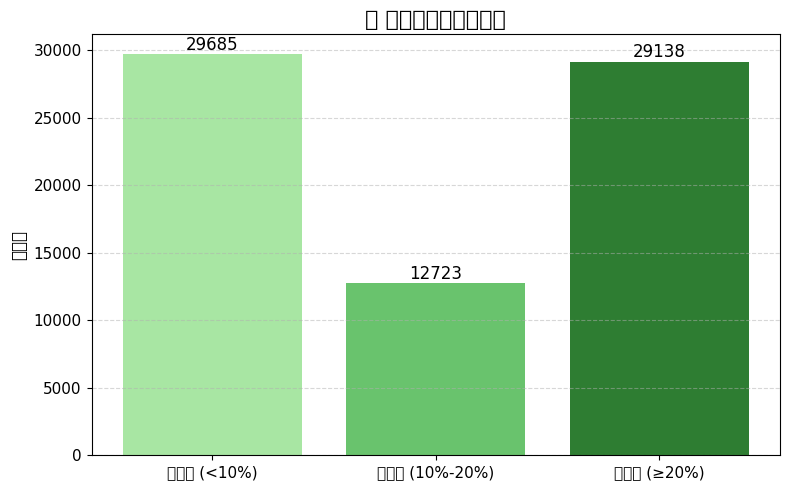

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 計算風險區間
risk_bins = pd.cut(
    y_proba, 
    bins=[0, 0.1, 0.2, 1.0], 
    labels=["低風險 (<10%)", "中風險 (10%-20%)", "高風險 (≥20%)"]
)
risk_counts = risk_bins.value_counts().sort_index()

# 畫圖
plt.figure(figsize=(8, 5))
bars = plt.bar(
    risk_counts.index,
    risk_counts.values,
    color=["#a8e6a3", "#69c36d", "#2e7d32"]  # 三階綠色漸層
)

# 加上數值標籤
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50,
        f'{height:.0f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# 圖表格式設定
plt.title("預測心臟病風險分布", fontsize=16)
plt.ylabel("樣本數", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
